### Texi guru challange applying the random SVR in the given model

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.preprocessing import MinMaxScaler 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

# pipeline
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

# Recursive features elemination
from sklearn.feature_selection import RFE
# Models
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

# Spliting components
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import mean_squared_error


In [2]:
try: # For kaggle
  train_pd = pd.read_csv('/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/train.csv')

  test_pd = pd.read_csv('/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/test.csv')
  print('running on kaggle')
except: #for local machine 
  print('running on local machine')
  train_pd = pd.read_csv('train.csv')
  test_pd = pd.read_csv('test.csv')
  pass
copy_train_pd = train_pd.copy()
copy_test_pd = test_pd.copy()
train_pd.info()

running on local machine
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175000 entries, 0 to 174999
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               175000 non-null  int64  
 1   tpep_pickup_datetime   175000 non-null  object 
 2   tpep_dropoff_datetime  175000 non-null  object 
 3   passenger_count        168923 non-null  float64
 4   trip_distance          175000 non-null  float64
 5   RatecodeID             168923 non-null  float64
 6   store_and_fwd_flag     168923 non-null  object 
 7   PULocationID           175000 non-null  int64  
 8   DOLocationID           175000 non-null  int64  
 9   payment_type           175000 non-null  object 
 10  extra                  175000 non-null  float64
 11  tip_amount             175000 non-null  float64
 12  tolls_amount           175000 non-null  float64
 13  improvement_surcharge  175000 non-null  float64
 14  total_amoun

In [3]:
train_pd.isna().sum()

VendorID                    0
tpep_pickup_datetime        0
tpep_dropoff_datetime       0
passenger_count          6077
trip_distance               0
RatecodeID               6077
store_and_fwd_flag       6077
PULocationID                0
DOLocationID                0
payment_type                0
extra                       0
tip_amount                  0
tolls_amount                0
improvement_surcharge       0
total_amount                0
congestion_surcharge     6077
Airport_fee              6077
dtype: int64

In [4]:
train_pd = copy_train_pd.copy()
x_train, x_test = train_test_split(train_pd, test_size= 0.2)
x_train_copy = x_train.copy()
x_test_copy = x_test.copy()

In [5]:
print('number of null values in the given dataset is:')
x_train.isna().sum()

number of null values in the given dataset is:


VendorID                    0
tpep_pickup_datetime        0
tpep_dropoff_datetime       0
passenger_count          4920
trip_distance               0
RatecodeID               4920
store_and_fwd_flag       4920
PULocationID                0
DOLocationID                0
payment_type                0
extra                       0
tip_amount                  0
tolls_amount                0
improvement_surcharge       0
total_amount                0
congestion_surcharge     4920
Airport_fee              4920
dtype: int64

In [6]:
print(f'''
unique values of passanger_count is: {x_train['passenger_count'].unique()}\n
unique values of RateCodeId is: {x_train['RatecodeID'].unique()}\n
unique values of store_and_fwd_flag is: {x_train['store_and_fwd_flag'].unique()}\n
unique values of congestion_surcharge is: {x_train['congestion_surcharge'].unique()}\n
unqiue values of airport_fees is: {x_train['Airport_fee'].unique()}\n
''')



unique values of passanger_count is: [ 1.  0.  2.  4.  3.  5. nan  6.  9.  8.]

unique values of RateCodeId is: [ 2.  1. 99.  3. nan  4.  5.]

unique values of store_and_fwd_flag is: ['N' nan 'Y']

unique values of congestion_surcharge is: [ 0.   2.5 -2.5  nan]

unqiue values of airport_fees is: [ 0.    1.75   nan -1.75]




In [7]:
x_train.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,extra,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
count,140000.000000,135080.000000,140000.000000,135080.000000,140000.000000,140000.000000,140000.000000,140000.000000,140000.000000,140000.000000,140000.000000,135080.000000,135080.000000
mean,0.727271,1.356418,5.522395,1.525052,132.683886,132.723779,1.932484,6.139266,0.649658,0.979505,29.664919,2.246539,0.158625
std,0.446229,0.889581,441.584071,6.562404,76.184603,76.196044,1.948903,4.666423,2.337533,0.199608,25.525713,0.819893,0.512081
min,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,-7.500000,0.000079,-29.300000,-1.000000,-576.750000,-2.500000,-1.750000
25%,0.000000,1.000000,1.080000,1.000000,67.000000,67.000000,0.000000,3.480055,0.000000,1.000000,16.300000,2.500000,0.000000
50%,1.000000,1.000000,1.840000,1.000000,133.000000,133.000000,1.000000,5.299961,0.000000,1.000000,21.450000,2.500000,0.000000
75%,1.000000,1.000000,3.630000,1.000000,199.000000,199.000000,2.500000,7.511135,0.000000,1.000000,31.900000,2.500000,0.000000
max,2.000000,9.000000,135182.060000,99.000000,264.000000,264.000000,11.750000,484.876151,80.000000,1.000000,587.250000,2.500000,1.750000


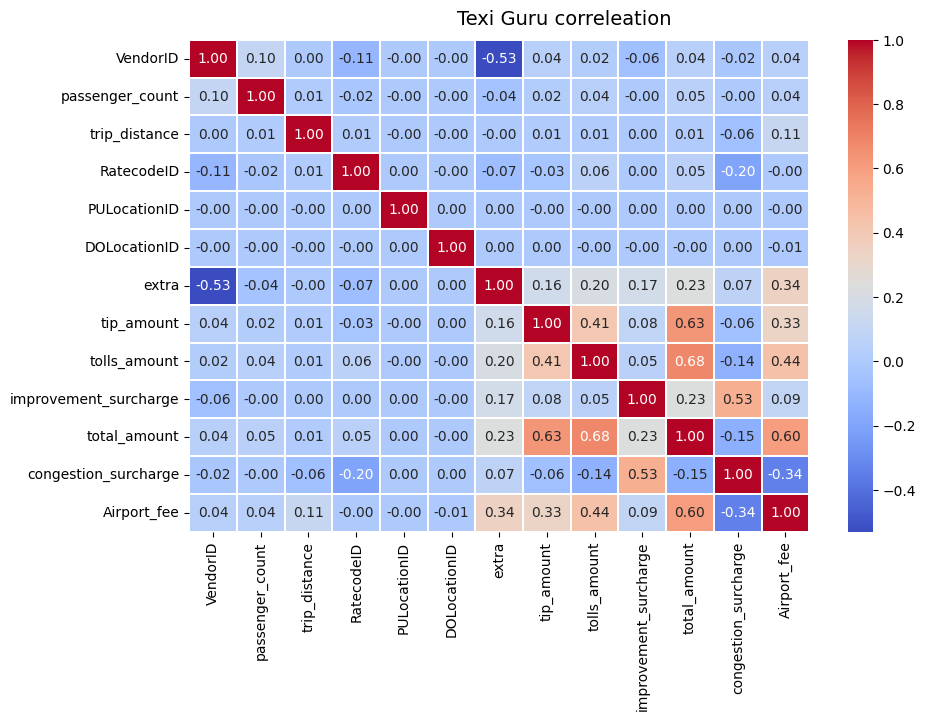

In [8]:
fig, ax = plt.subplots(figsize=(10, 6))
corr = x_train.corr(numeric_only= True)
heat_map = sns.heatmap(round(corr, 2), annot= True, ax= ax, cmap= 'coolwarm',
                       fmt= '.2f', linewidths= 0.05)
fig.subplots_adjust(top= 0.93)
title = fig.suptitle('Texi Guru correleation', fontsize= 14)

In [9]:
def convert_dt_obj_to_datetime(df:pd.DataFrame, col_name:str):
    df[col_name] = pd.to_datetime(df[col_name])
    df[col_name +'_Year'] = df[col_name].apply(lambda time: time.year)
    df[col_name +'_Month'] = df[col_name].apply(lambda time: time.month)
    df[col_name +'_Day'] = df[col_name].apply(lambda time: time.day)
    df[col_name +'_Hour'] = df[col_name].apply(lambda time: time.hour)
#     df[col_name +'_Minute'] = df[col_name].apply(lambda time: time.minute) # IGNORING MINS

In [10]:
x_train, x_test = x_train_copy.copy(), x_test_copy.copy()

convert_dt_obj_to_datetime(x_train, 'tpep_pickup_datetime')
convert_dt_obj_to_datetime(x_test, 'tpep_pickup_datetime')
x_train = x_train.drop('tpep_pickup_datetime', axis= 1)
x_test = x_test.drop('tpep_pickup_datetime', axis= 1)

convert_dt_obj_to_datetime(x_train, 'tpep_dropoff_datetime')
convert_dt_obj_to_datetime(x_test, 'tpep_dropoff_datetime')

x_train = x_train.drop('tpep_dropoff_datetime', axis= 1)
x_test = x_test.drop('tpep_dropoff_datetime', axis= 1)

x_train.info()
x_train_copy, x_test_copy = x_train.copy(), x_test.copy()

<class 'pandas.core.frame.DataFrame'>
Index: 140000 entries, 148353 to 70080
Data columns (total 23 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   VendorID                     140000 non-null  int64  
 1   passenger_count              135080 non-null  float64
 2   trip_distance                140000 non-null  float64
 3   RatecodeID                   135080 non-null  float64
 4   store_and_fwd_flag           135080 non-null  object 
 5   PULocationID                 140000 non-null  int64  
 6   DOLocationID                 140000 non-null  int64  
 7   payment_type                 140000 non-null  object 
 8   extra                        140000 non-null  float64
 9   tip_amount                   140000 non-null  float64
 10  tolls_amount                 140000 non-null  float64
 11  improvement_surcharge        140000 non-null  float64
 12  total_amount                 140000 non-null  float64
 13  

#### creating pipeline for the dataset

In [11]:
cv_shuffle_20 = ShuffleSplit(n_splits= 20, test_size= 0.1)
cv_shuffle_5 = ShuffleSplit(n_splits= 5, test_size= 0.1)

In [12]:
x_train = x_train_copy.copy()
y_train = x_train['total_amount']
x_train = x_train.drop('total_amount', axis= 1)

x_test = x_test_copy.copy()
y_test = x_test['total_amount']
x_test = x_test.drop('total_amount', axis= 1)

In [13]:
com_train_features, dev_train_features, com_train_label, dev_train_label = train_test_split(x_train, y_train, test_size= 0.2)

In [14]:
vendor_id_pipe = Pipeline([
  ('one_hot_encoder', OneHotEncoder(handle_unknown= 'ignore'))
])
passanger_count_pipe = Pipeline([
    ('simple_imputer', SimpleImputer(missing_values=np.nan, strategy='constant', fill_value= 1)),
    ('std_scaler', StandardScaler())
])

rate_code_id_pipe = Pipeline([
       ('simple_imputer', SimpleImputer(missing_values=np.nan, strategy='constant',
                                         fill_value= 1)),
       ('one_hot_encoder', OneHotEncoder(handle_unknown= 'ignore')) ## TODO: experimental changes
])

store_and_fwd_pipe = Pipeline([
    ('simple_immmputer', SimpleImputer(missing_values= np.nan, strategy='constant', fill_value='N')),
    ('one_hot_encoder', OneHotEncoder(handle_unknown= 'ignore'))
])
congestion_charger_pipe = Pipeline([
    ('simple_imputer', SimpleImputer(missing_values=np.nan, strategy='constant', fill_value= 0)),
    ('std_scaler', StandardScaler())
])

airport_fee_pipe = Pipeline([
    ('simple_imputer', SimpleImputer(missing_values=np.nan, strategy='constant', fill_value= 0)),
    ('std_scale', StandardScaler())
])

payment_type_pipe = Pipeline([
    ('one_hot_encoder', OneHotEncoder(handle_unknown= 'ignore'))
])

In [15]:
feature_scaling_pipeline = ColumnTransformer([
  ('vendor_id', vendor_id_pipe, ['VendorID']),
  ('passanger_count', passanger_count_pipe, ['passenger_count']),
  ('rate_code_id', rate_code_id_pipe, ['RatecodeID']), # experimental changes
  ('s_nd_f_flag', store_and_fwd_pipe, ['store_and_fwd_flag']),
  ('pu_loc', StandardScaler(), ['PULocationID']),
  ('du_loc', StandardScaler(), ["DOLocationID"]),
  ('payment_t', payment_type_pipe, ['payment_type']),
  ('extra_t', StandardScaler(), ['extra']),
  ('tip_amount_t', StandardScaler(), ['tip_amount']),
  ('tolls_amount_t', StandardScaler(), ["tolls_amount"]),
  ('improvement_c', StandardScaler(), ['improvement_surcharge']),
  ('cong_charge', congestion_charger_pipe, ['congestion_surcharge']),
  ('Airport_fee_t', airport_fee_pipe, ['Airport_fee']),
  ('std_scaler', StandardScaler(), [i for i in range(14, 22)])
], remainder='passthrough')
feature_scaling_pipeline

ColumnTransformer(remainder='passthrough',
                  transformers=[('vendor_id',
                                 Pipeline(steps=[('one_hot_encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['VendorID']),
                                ('passanger_count',
                                 Pipeline(steps=[('simple_imputer',
                                                  SimpleImputer(fill_value=1,
                                                                strategy='constant')),
                                                 ('std_scaler',
                                                  StandardScaler())]),
                                 ['passenger_count']),
                                ('rate_code_id',
                                 Pipeline(steps=[(...
                                 Pipeline(steps=[('simple_imputer',
                                                  SimpleImputer(fill_value=0,
                                                                strategy='constant')),
                                                 ('std_scaler',
                                                  StandardScaler())]),
                                 ['congestion_surcharge']),
                                ('Airport_fee_t',
                                 Pipeline(steps=[('simple_imputer',
                                                  SimpleImputer(fill_value=0,
                                                                strategy='constant')),
                                                 ('std_scale',
                                                  StandardScaler())]),
                                 ['Airport_fee']),
                                ('std_scaler', StandardScaler(),
                                 [14, 15, 16, 17, 18, 19, 20, 21])])

In [16]:
svr_pipeline = Pipeline([
    ('feature_scaling', feature_scaling_pipeline),
    ('svr', SVR(cache_size= 2000, degree= 2))
])

svr_pipeline

Pipeline(steps=[('feature_scaling',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('vendor_id',
                                                  Pipeline(steps=[('one_hot_encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['VendorID']),
                                                 ('passanger_count',
                                                  Pipeline(steps=[('simple_imputer',
                                                                   SimpleImputer(fill_value=1,
                                                                                 strategy='constant')),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  ['passenger_count']...
                                                                   SimpleImputer(fill_value=0,
                                                                                 strategy='constant')),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  ['congestion_surcharge']),
                                                 ('Airport_fee_t',
                                                  Pipeline(steps=[('simple_imputer',
                                                                   SimpleImputer(fill_value=0,
                                                                                 strategy='constant')),
                                                                  ('std_scale',
                                                                   StandardScaler())]),
                                                  ['Airport_fee']),
                                                 ('std_scaler',
                                                  StandardScaler(),
                                                  [14, 15, 16, 17, 18, 19, 20,
                                                   21])])),
                ('svr', SVR(cache_size=2000, degree=2))])

In [17]:
svr_pipeline.fit(com_train_features, com_train_label)

Pipeline(steps=[('feature_scaling',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('vendor_id',
                                                  Pipeline(steps=[('one_hot_encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['VendorID']),
                                                 ('passanger_count',
                                                  Pipeline(steps=[('simple_imputer',
                                                                   SimpleImputer(fill_value=1,
                                                                                 strategy='constant')),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  ['passenger_count']...
                                                                   SimpleImputer(fill_value=0,
                                                                                 strategy='constant')),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  ['congestion_surcharge']),
                                                 ('Airport_fee_t',
                                                  Pipeline(steps=[('simple_imputer',
                                                                   SimpleImputer(fill_value=0,
                                                                                 strategy='constant')),
                                                                  ('std_scale',
                                                                   StandardScaler())]),
                                                  ['Airport_fee']),
                                                 ('std_scaler',
                                                  StandardScaler(),
                                                  [14, 15, 16, 17, 18, 19, 20,
                                                   21])])),
                ('svr', SVR(cache_size=2000, degree=2))])

In [18]:
svr_pipeline.score(com_train_features, com_train_label)

0.5354419296876675

In [19]:
svr_pipeline.score(dev_train_features, dev_train_label)

0.5447220598084137